# 图像高斯滤波算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import math
from scipy import signal

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [11]:
def gauss1d(sigma):
	len = round(sigma * 6)
	#If it's even, round it to the next odd by adding one
	if len % 2 == 0:
		len  += 1

	#Set up the array with incrementing by one e.g. [-2, -1, 0, 1, 2]
	arr = np.arange(round(-len/2+1), len/2, 1)
	#Apply the Gaussian function
	arr = np.exp( -1 * np.power(arr, 2) / (2 * np.power(sigma, 2)) )
	#Normalize by dividing by the sum
	return arr/sum(arr)

def gauss2d(sigma):
	#Get one axis of the 2D Gaussian filter by using the gauss1d 
	#we already have and converting it to 2D
	a = gauss1d(sigma)
	a = a[np.newaxis]

	#Do the same for the other axis, but make sure to transpose it
	b = gauss1d(sigma)
	b = np.transpose(b[np.newaxis])

	#Convolve the two matrices to create 2D Gaussian filter
	return signal.convolve2d(a, b)

def gaussconvolve2d(image,sigma):
	#Load up the Gaussian filter in a variable named filter
	filter_ = gauss2d(sigma)
	#Take the dir from input, open the image and convert to greyscale
	im = np.float64(image)
	
	#Convert it to a numpy array and apply the Gaussian filter
	im = signal.convolve2d(im,filter_,'same')

	#Transform the array back to an image, remember to output as a greyscale as well
	out = cv2.convertScaleAbs(im)

	return out

In [12]:
dst_r = gaussconvolve2d(src[:,:,0],0.5)
dst_g = gaussconvolve2d(src[:,:,1],0.5)
dst_b = gaussconvolve2d(src[:,:,2],0.5)
dst = cv2.merge([dst_r,dst_g,dst_b])

Text(0.5,1,'DST')

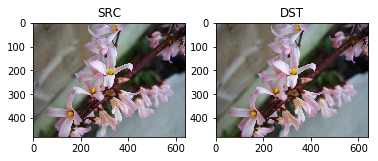

In [13]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('DST')

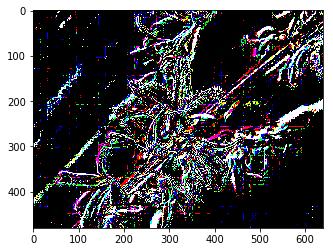

In [14]:
plt.imshow((dst - src))

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45245019